In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches
import geopandas as gpd

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d ariyoomotade/netflix-data-cleaning-analysis-and-visualization

Dataset URL: https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization
License(s): CC0-1.0
100% 270k/270k [00:00<00:00, 818kB/s]
100% 270k/270k [00:00<00:00, 818kB/s]


In [3]:
!unzip netflix-data-cleaning-analysis-and-visualization.zip

Archive:  netflix-data-cleaning-analysis-and-visualization.zip
  inflating: netflix1.csv            


In [57]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d paultimothymooney/latitude-and-longitude-for-every-country-and-state

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state
License(s): CC-BY-SA-4.0
  0% 0.00/6.29k [00:00<?, ?B/s]
100% 6.29k/6.29k [00:00<00:00, 13.9MB/s]


In [58]:
!unzip latitude-and-longitude-for-every-country-and-state.zip

Archive:  latitude-and-longitude-for-every-country-and-state.zip
  inflating: world_country_and_usa_states_latitude_and_longitude_values.csv  


In [59]:
lat_lon = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

In [4]:
# Load dataset into a DataFrame
df = pd.read_csv('netflix1.csv')
# Display the first few rows of the dataset to understand its structure
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.isnull().sum(axis=0)

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [6]:
df.shape

(8790, 10)

In [7]:
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


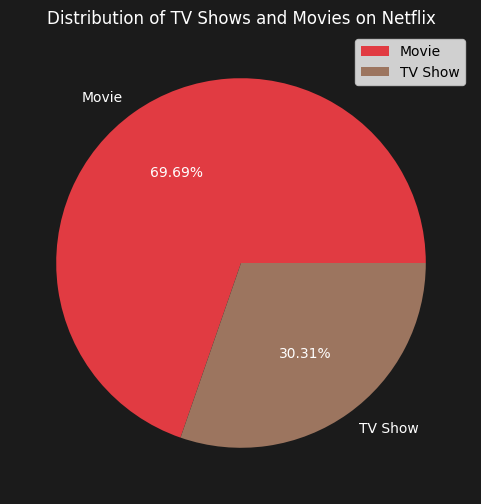

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['type'].value_counts(), labels=df['type'].value_counts().index,
       autopct='%1.2f%%',
       colors=['#e13b42', '#9c755f'],
       textprops={'color': 'white'})
ax.set_title('Distribution of TV Shows and Movies on Netflix')
fig.patch.set_facecolor('#1b1b1b')

ax.set_title('Distribution of TV Shows and Movies on Netflix', color='white')
ax.legend()
plt.show()

In [90]:
task_2_1 = pd.crosstab(df['country'], df['type'])
task_2_1['total'] = task_2_1['Movie'] + task_2_1['TV Show']
task_2_1.drop('Not Given', axis=0, inplace=True)

In [91]:
dt_merged = pd.merge(task_2_1, lat_lon, on='country')

In [97]:
from sklearn.preprocessing import MinMaxScaler
dt_merged['total_scl'] = MinMaxScaler().fit_transform(dt_merged[['total']])

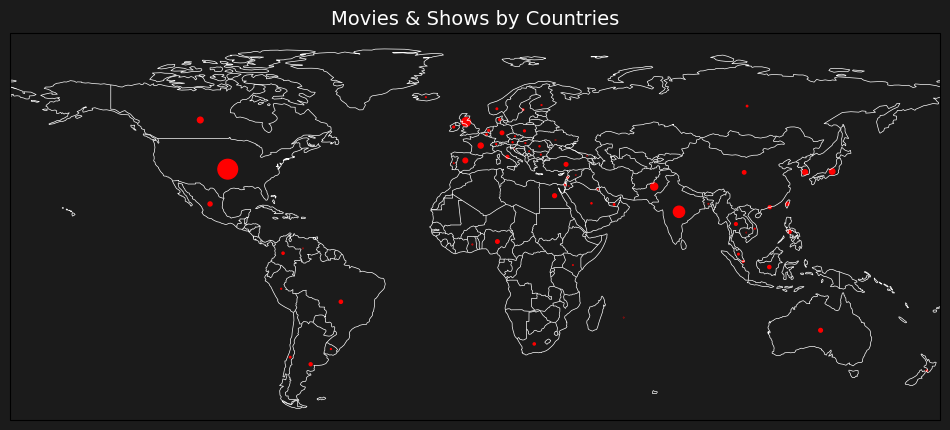

In [105]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# تنظیم تصویر
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# رسم مرز کشورها و خطوط ساحلی
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='white')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='white')
ax.scatter(dt_merged['longitude'], dt_merged['latitude'], s=dt_merged['total_scl']*200, c='Red'
)
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
ax.set_facecolor('#1b1b1b')

fig.patch.set_facecolor('#1b1b1b')

ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
plt.title("Movies & Shows by Countries", color='white',fontsize=14)
plt.show()

In [9]:
task_2 = pd.crosstab(df['country'], df['type'])
task_2['total'] = task_2['Movie'] + task_2['TV Show']
task_2.drop('Not Given', axis=0, inplace=True)
task_2 = task_2.sort_values(by='total', ascending=False).head(10)
task_2.reset_index(inplace=True)
task_2

type,country,Movie,TV Show,total
0,United States,2395,845,3240
1,India,976,81,1057
2,United Kingdom,387,251,638
3,Pakistan,71,350,421
4,Canada,187,84,271
5,Japan,87,172,259
6,South Korea,49,165,214
7,France,148,65,213
8,Spain,129,53,182
9,Mexico,90,48,138


In [10]:
def addlabels(x,y, col=''):
    for i in range(len(x)):
      if col == 'TV Show' and y.loc[i, 'TV Show'] >= 65:
        ax.text(y.loc[i, 'TV Show']//3, i,y.loc[i, 'TV Show'], color='white')
      elif col == 'Movie' and y.loc[i, 'Movie'] >= 87:
        dp = y.loc[i, 'TV Show'] + (y.loc[i, 'Movie'] // 2)
        ax.text(dp, i, y.loc[i, 'Movie'], ha='center', va='center', color='white')
      else:
        dp = y.loc[i, 'TV Show'] + y.loc[i, 'Movie']
        ax.text(dp, i,dp, color='white')

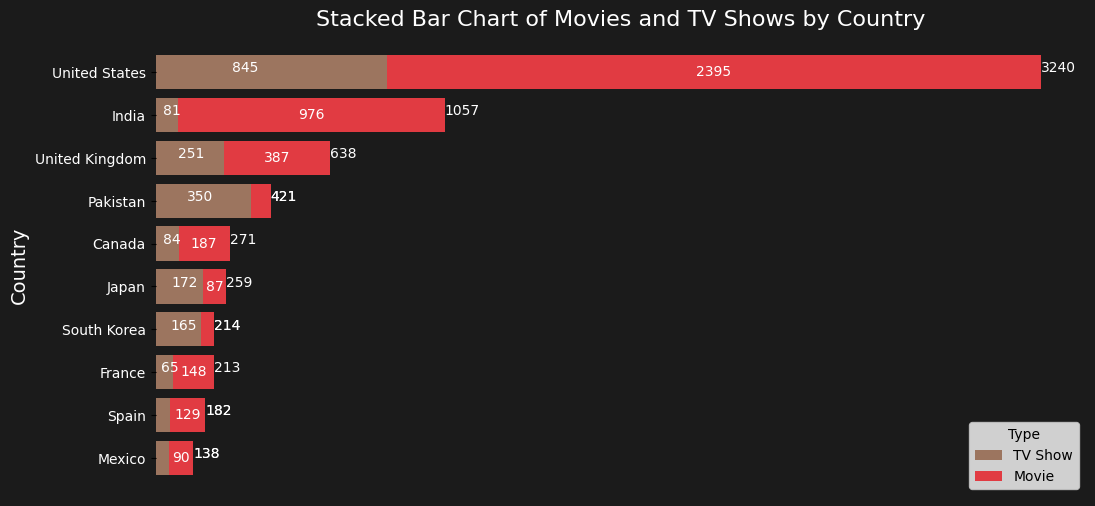

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(task_2['country'], task_2['TV Show'], label='TV Show', color='#9c755f')
addlabels(task_2['country'], task_2[['TV Show', 'Movie']], 'TV Show')
ax.barh(task_2['country'], task_2['Movie'], label='Movie', left=task_2['TV Show'], color='#e13b42')
addlabels(task_2['country'], task_2[['TV Show', 'Movie']], 'Movie')
addlabels(task_2['country'], task_2[['TV Show', 'Movie']])

# تنظیمات محور و برچسب‌ها
ax.set_title('Stacked Bar Chart of Movies and TV Shows by Country', fontsize=16, color='white')
ax.set_ylabel('Country', fontsize=14, color='white')
plt.xticks(rotation=45, ha='right')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')
ax.legend(title='Type')
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines[['right', 'left', 'bottom', 'top']].set_visible(False)
plt.show()

In [12]:
task_3 = df.groupby('release_year').agg({'title': 'count'})

In [13]:
task_3 = task_3[task_3.index >= 2008]
task_3.reset_index(inplace=True)

In [14]:
def addlabels(x,y):
  for i in range(len(x)):
      ax.text(x[i], y[i],  str(y[i]), color='white')


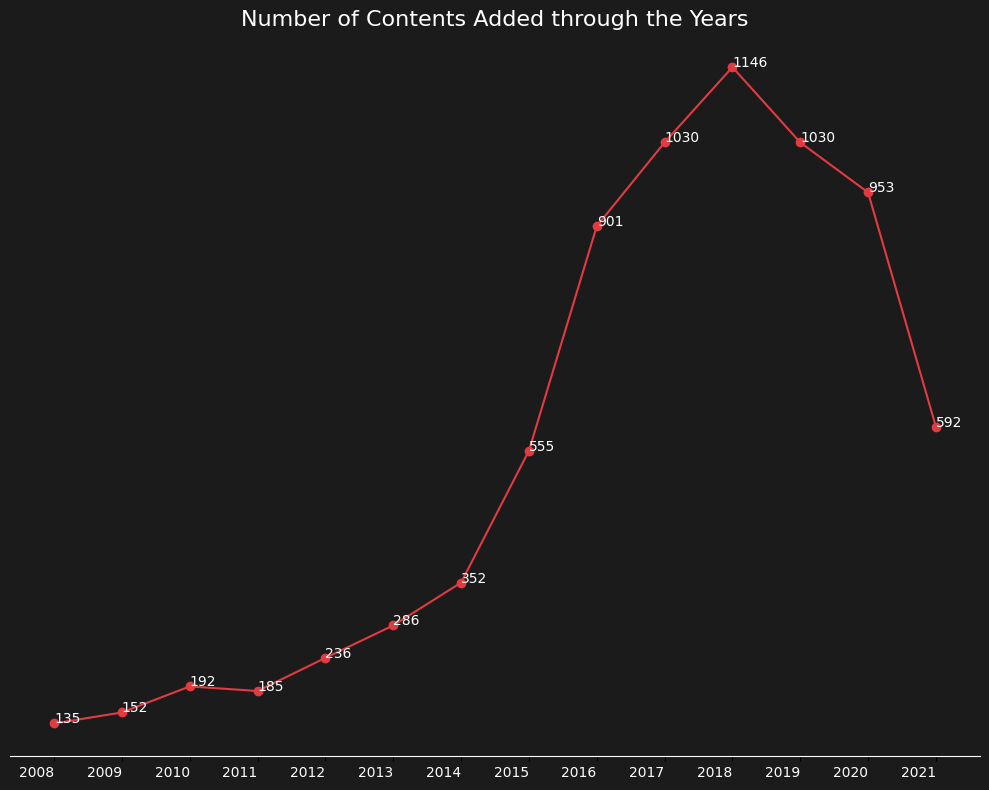

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the data
ax.plot(task_3['release_year'], task_3['title'], color='#e13b42', marker='o')
addlabels(task_3['release_year'], task_3['title'])

ax.set_title('Number of Contents Added through the Years', fontsize=16, color='white')
plt.xticks(range(2008, 2022),ha='right', color='white')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')

ax.yaxis.set_visible(False)

ax.spines[['right', 'left', 'top']].set_visible(False)
ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.show()

In [16]:
task_4 = pd.crosstab(df['director'], df['type'])
task_4['total'] = task_4['Movie'] + task_4['TV Show']
task_4.sort_values(by='total', ascending=False, inplace=True)
task_4.drop('Not Given', axis=0, inplace=True)
task_4.reset_index(inplace=True)
task_4 = task_4[:10]

In [22]:
def addlabels(x,y, col=''):
    for i in range(len(x)):
      if y.loc[i, col] > 0:
        if col == 'TV Show' and y.loc[i, 'TV Show'] >= 0:
          ax.text(y.loc[i, 'TV Show']//2, i,y.loc[i, 'TV Show'], color='white')
        elif col == 'Movie' and y.loc[i, 'Movie'] == 4:
          dp = y.loc[i, 'TV Show'] + (y.loc[i, 'Movie'] // 2)
          ax.text(dp, i, y.loc[i, 'Movie'], ha='center', va='center', color='white')
        else:
          dp = y.loc[i, 'TV Show'] + y.loc[i, 'Movie']
          ax.text(dp, i,dp, color='white')

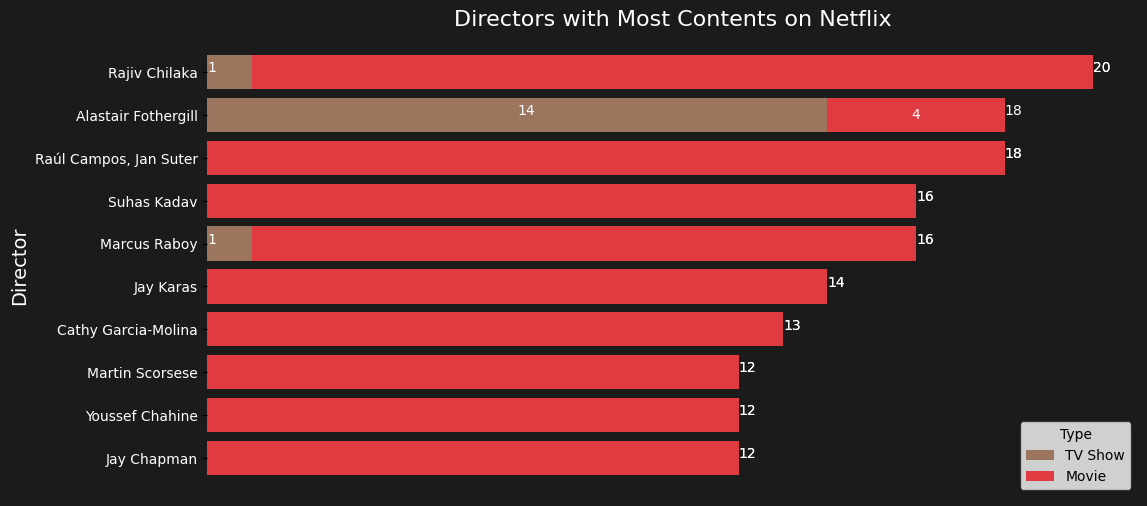

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(task_4['director'], task_4['TV Show'], label='TV Show', color='#9c755f')
addlabels(task_4['director'], task_4[['TV Show', 'Movie']], 'TV Show')
ax.barh(task_4['director'], task_4['Movie'], label='Movie', left=task_4['TV Show'], color='#e13b42')
addlabels(task_4['director'], task_4[['TV Show', 'Movie']], 'Movie')
addlabels(task_4['director'], task_4, 'total')

ax.set_title('Directors with Most Contents on Netflix', fontsize=16, color='white')
ax.set_ylabel('Director', fontsize=14, color='white')
plt.xticks(rotation=45, ha='right')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')
ax.legend(title='Type')
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines[['right', 'left', 'bottom', 'top']].set_visible(False)
plt.show()

In [24]:
task_5 = df.groupby('listed_in').agg({'title': 'count'}).sort_values(by='title', ascending=False).head(10)

In [25]:
task_5.reset_index(inplace=True)

In [26]:
def addlabels(x,y):
  for i in range(len(x)):
      ax.text(y[i], i,  str(y[i]), color='white')


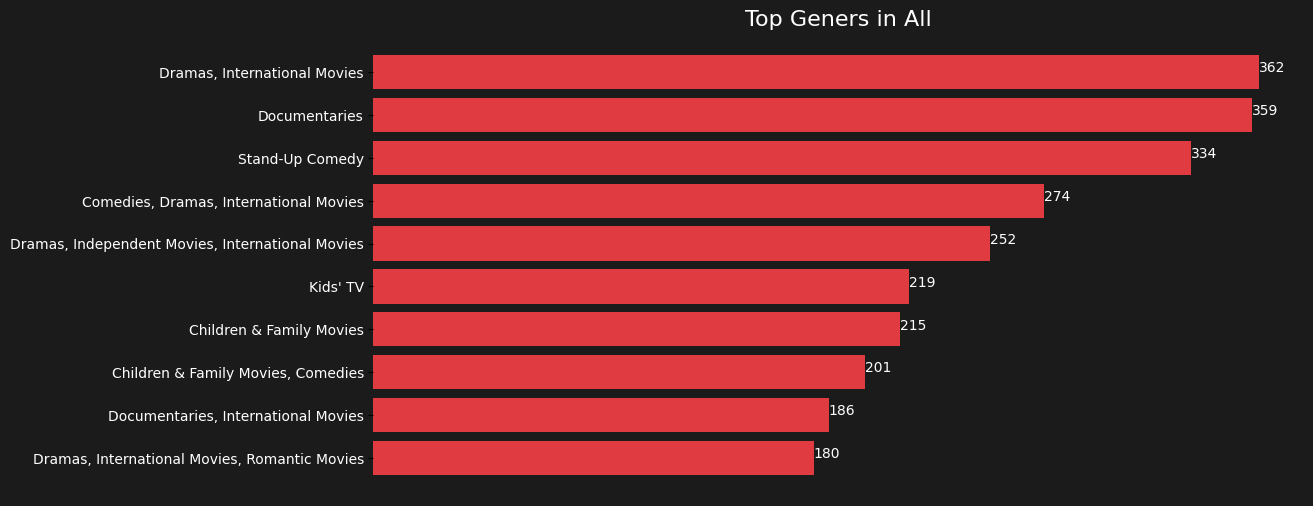

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(task_5['listed_in'], task_5['title'], color='#e13b42')
addlabels(task_5['listed_in'], task_5['title'])

ax.set_title('Top Geners in All', fontsize=16, color='white')
plt.xticks(rotation=45, ha='right')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines[['right', 'left', 'bottom', 'top']].set_visible(False)
plt.show()

In [28]:
task_6 = df.groupby('rating').agg({'title': 'count'}).sort_values(by='title', ascending=False)
task_6.reset_index(inplace=True)

In [30]:
def addlabels(x,y):
  for i in range(len(x)):
      ax.text(i-0.25, y[i]+15, str(y[i]), color='white')


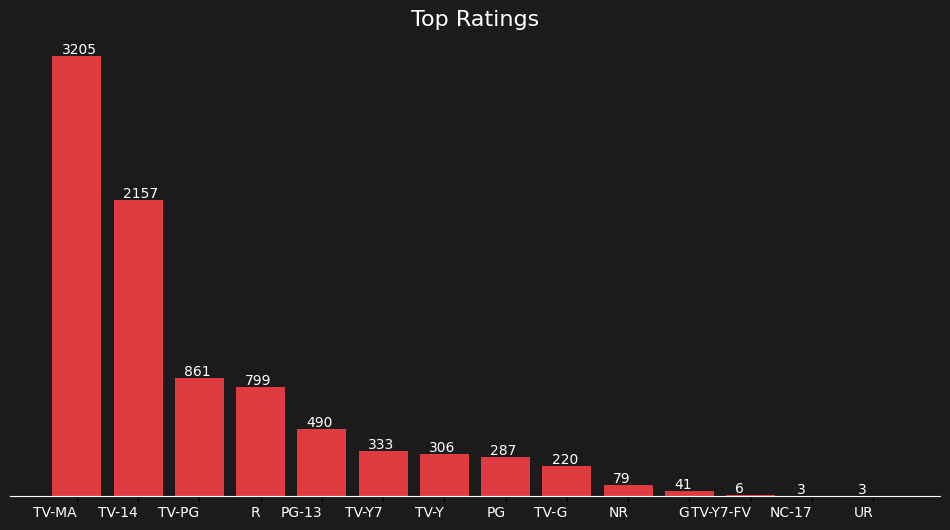

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(task_6['rating'], task_6['title'], color='#e13b42')
addlabels(task_6['rating'], task_6['title'])

# تنظیمات محور و برچسب‌ها
ax.set_title('Top Ratings', fontsize=16, color='white')
plt.xticks(rotation=0, ha='right', color='white')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')
# ax.invert_yaxis()
ax.yaxis.set_visible(False)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.spines['bottom'].set_color('white')
plt.show()

In [32]:
task_7 = df.sort_values(by='release_year', ascending=True).head(10)

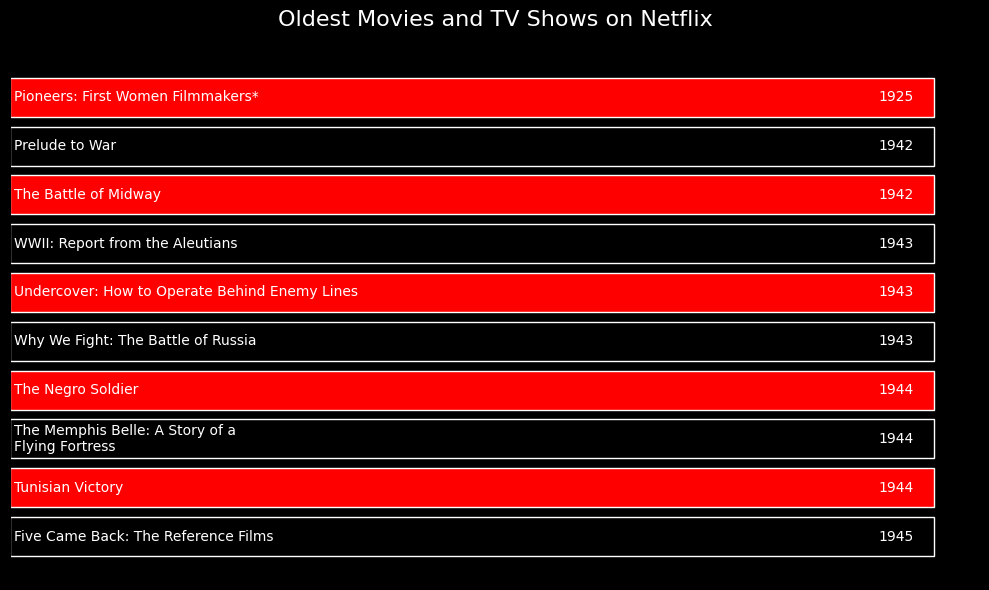

In [33]:
plt.figure(figsize=(10, 6))

for i, (title, year) in enumerate(zip(task_7['title'], task_7['release_year'])):
    color = 'red' if i % 2 == 0 else 'black'
    plt.barh(i, 5, color=color, edgecolor='white')
    plt.text(0.02, i, f"{title}", va='center', ha='left', color='white', fontsize=10)
    plt.text(4.7, i, f"{year}", va='center', ha='left', color='white', fontsize=10)

ax = plt.gca()
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.title(
    "Oldest Movies and TV Shows on Netflix", fontsize=16, color = 'white', pad=20)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [34]:
task_8 = pd.crosstab(df['release_year'], df['type']).reset_index()
task_8 = task_8[task_8['release_year'] >= 2008].reset_index()

In [36]:
def addlabels(x,y):
  for i in range(len(x)):
      ax.text(x[i], y[i],  str(y[i]), color='white')


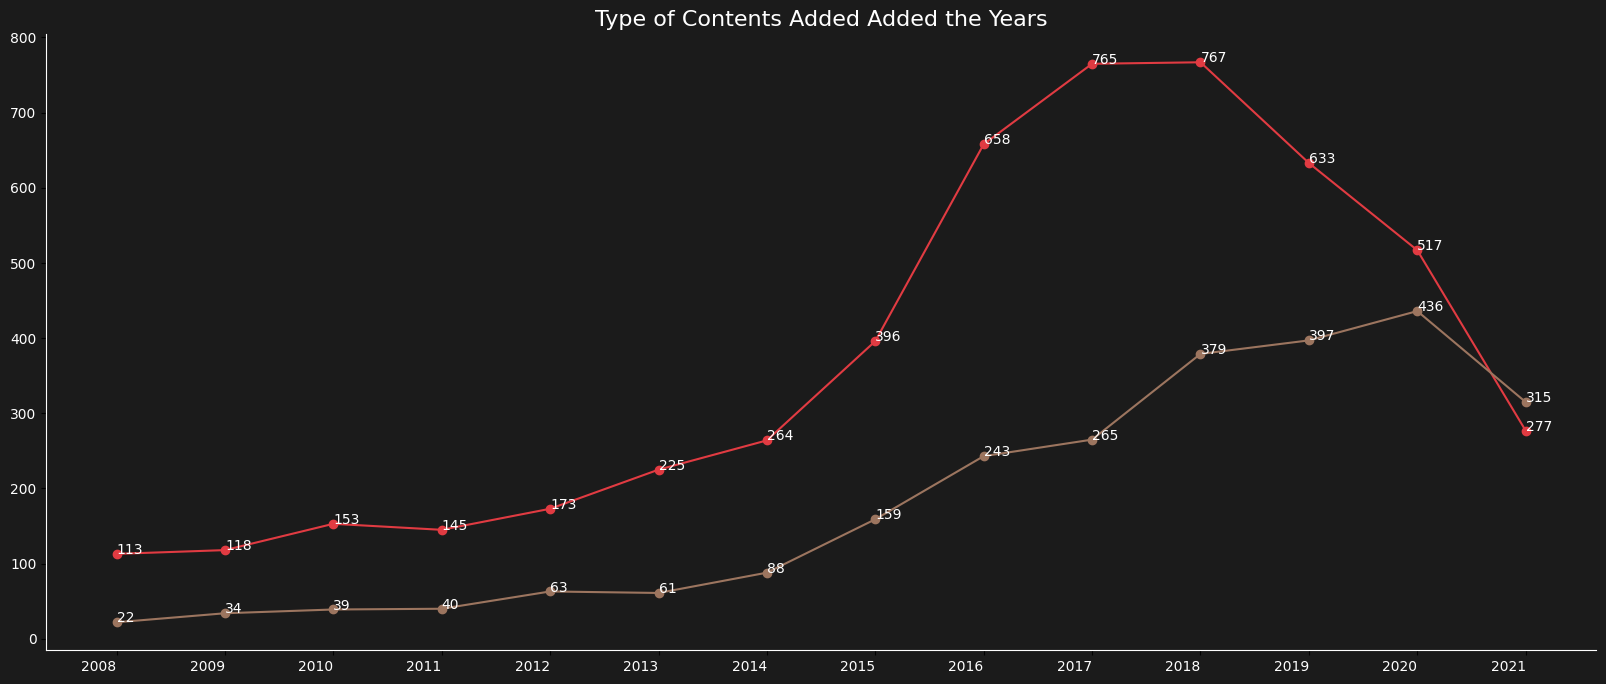

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plotting the data
ax.plot(task_8['release_year'], task_8['Movie'], color='#e13b42', marker='o')
ax.plot(task_8['release_year'], task_8['TV Show'], color='#9c755f', marker='o')
addlabels(task_8['release_year'], task_8['Movie'])
addlabels(task_8['release_year'], task_8['TV Show'])

ax.set_title('Type of Contents Added Added the Years', fontsize=16, color='white')
plt.xticks(range(2008, 2022),ha='right', color='white')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')


ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('white')

plt.show()

In [38]:
task_9 = df.groupby('release_year').agg({'title': 'count'})
task_9 = task_9[task_9.index >= 2012]
task_9.reset_index(inplace=True)

In [40]:
def addlabels(x,y):
  for i in range(len(x)):
      ax.text(x[i], y[i],  str(y[i]), color='white')


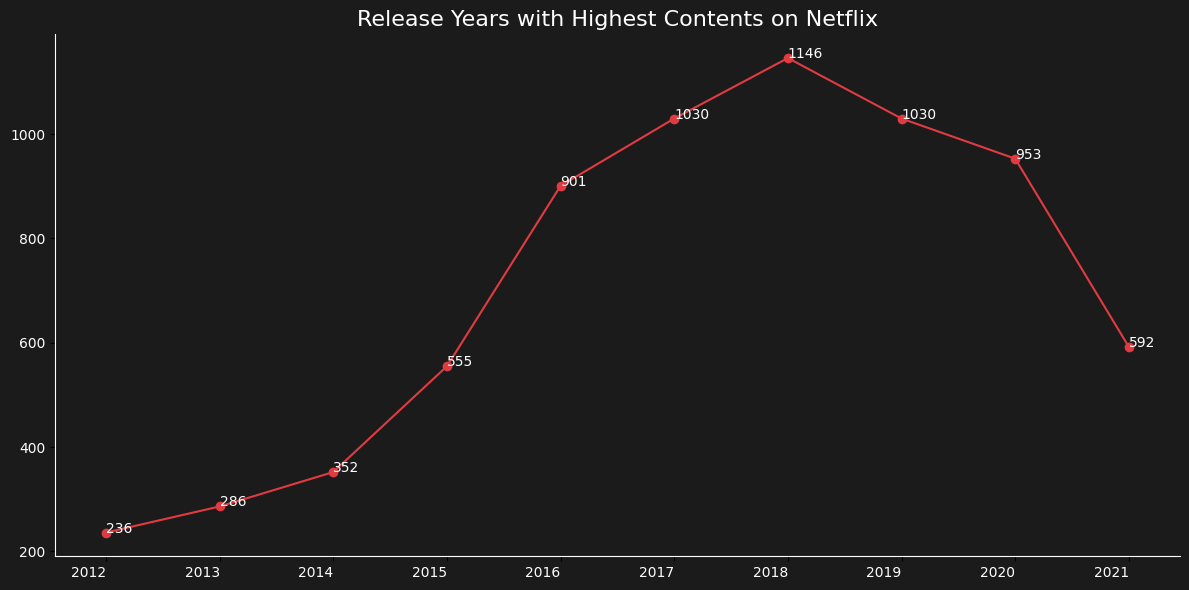

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the data
ax.plot(task_9['release_year'], task_9['title'], color='#e13b42', marker='o')
addlabels(task_9['release_year'], task_9['title'])

ax.set_title('Release Years with Highest Contents on Netflix', fontsize=16, color='white')
plt.xticks(range(2012, 2022),ha='right', color='white')
plt.yticks(color='white')
fig.patch.set_facecolor('#1b1b1b')
ax.set_facecolor('#1b1b1b')

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('white')

plt.tight_layout()
plt.show()